## Find out what type of startups are getting funded in the last few years?


## TOP 5

In [15]:
## in CSV

import csv
file_obj = open('startup_Funding.csv' , encoding = 'utf-8')
file_data = csv.DictReader(file_obj , skipinitialspace = True)

startup_funding =  {}
for row in file_data:
    key = row['StartupName']
    value = row['AmountInUSD']
    
    if value != '':
        value = value.replace(',', '')
        value = int(float(value))
    else:
        value = 0
    if key in startup_funding:
        startup_funding[key] = startup_funding[key] + value
    else:
        startup_funding[key] = value


sorted_funding = sorted(startup_funding.items(), key=lambda x: x[1], reverse=True)

# Print results
for startup, amount in sorted_funding[:5]:
    print(startup, int(amount))




Paytm 2140000000
Flipkart 1559700000
Ola 984500000
Snapdeal 700000000
Flipkart.com 700000000


In [26]:
# in numpy
import csv 
import numpy as np

file_obj = open('startup_Funding.csv' , encoding = 'utf-8')
file_data = csv.DictReader(file_obj , skipinitialspace = True)

amount = []
startup = []

for row in file_data:
    amount.append(row['AmountInUSD'])
    startup.append(row['StartupName'])


a =  np.array(amount)
s = np.array(startup)


a = np.char.replace(a, ',', '') 

a[a == ''] = '0' 
a = np.array(a , dtype = float)
a = np.array(a , dtype = int)

# Sort in descending order
sorted_indices = np.argsort(a)[::-1]  

for i in sorted_indices[:5]:
    print(s[i],a[i])


Paytm 1400000000
Flipkart 1400000000
Flipkart.com 700000000
Paytm 680000000
Snapdeal 500000000


# Project 

## Q1
Given File 'startup_funding.csv'

Check the trend of investments over the years. To check the trend, find -

Total number of fundings done in each year.

Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.

Print year-wise total number of fundings also. Print years in ascending order.

Note :
There is some error in the 'Date' feature. Make sure to handle that.

Output Format :
year1 TotalFunding1
year2 TotalFunding2
. . . 

2015 391
2016 399
2017 188


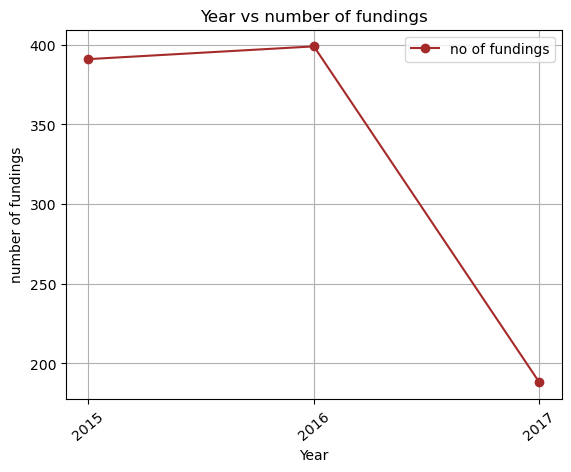

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

a = pd.read_csv('startup_funding.csv' , encoding = 'utf-8')
b = a.copy()
a
b['Date'] = pd.to_datetime( b['Date'] , errors = 'coerce')
b['Year'] = b['Date'].dt.year


funds_count = b['Year'].value_counts().sort_index()

for year , count in funds_count.items():
    print(int(year) , count)

plt.plot(funds_count.index , funds_count.values , marker = 'o' , color = 'brown' , label ='no of fundings' )
plt.grid()
plt.title('Year vs number of fundings')
plt.xlabel('Year')
plt.ylabel('number of fundings')
plt.legend()

# Yeh line ensure karti hai ki x-axis par years as integers show ho, bina decimals ke.
plt.xticks(funds_count.index.astype(int) , rotation = 40)
plt.show()

## Q2
Problem statement
Given File 'startup_funding.csv'

Find out which cities are generally chosen for starting a startup.

Find top 10 Indian cities which have most number of startups ?

Plot a pie chart and visualise it.

Print the city name and number of startups in that city also.

Note :
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the number of startups.

Output Format :
city1 number1
city2 number2
. . . 

Bangalore 635
Mumbai 449
New Delhi 385
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


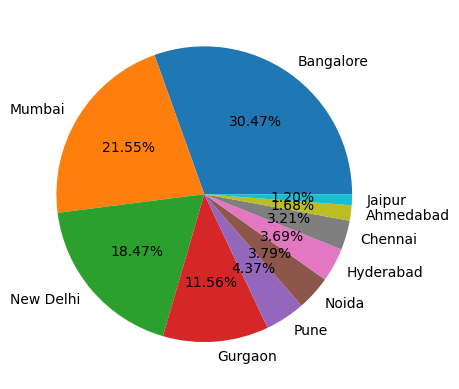

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

a = pd.read_csv('startup_funding.csv' , encoding = 'utf-8')
b = a.copy()



# unh rows ko hatado joh khali h 
b = b.dropna(subset=['CityLocation'])

#Clean + Extract first city only
b['CityLocation'] = b['CityLocation'].apply(lambda x: x.split('/')[0].strip())
b['CityLocation'] = b['CityLocation'].str.strip().str.title()



b['CityLocation'].replace( {'Delhi': 'New Delhi' , 'bangalore': 'Bangalore' } )



#  Count top 10 cities
top_city = b['CityLocation'].value_counts().head(10)

for city , count in top_city.items():
    print(city , count)

plt.pie(top_city.values , labels = top_city.index , autopct='%.2f%%')
plt.show()




## Q3
Problem statement
Given File 'startup_funding.csv'

Find out if cities play any role in receiving funding.

Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).

Print the city and percentage with 2 decimal place after rounding off.

Note:
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the percentage of funding.

Output Format :
city1 percent1
city2 percent2
city3 percent3
. . . 



Bangalore 49.72
New Delhi 16.63
Mumbai 13.9
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


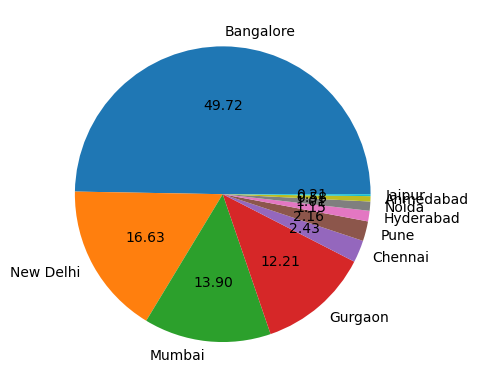


⏳ Total time taken: 0.1990 seconds


In [184]:
import pandas as pd
import matplotlib.pyplot as plt


import time  # stopwatch ke liye

start_time = time.time()  # ⏱️ Start stopwatch

a = pd.read_csv('startup_funding.csv' , encoding = 'utf-8')
b = a.copy()



# unh rows ko hatado joh khali h 
b = b.dropna(subset=['CityLocation'])

#Clean + Extract first city only
b['CityLocation'] = b['CityLocation'].apply(lambda x: x.split('/')[0].strip())
b['CityLocation'] = b['CityLocation'].str.strip().str.title()



b['CityLocation'].replace( {'Delhi': 'New Delhi' , 'bangalore': 'Bangalore' } )

# Clean Amount column
b['AmountInUSD'] = b['AmountInUSD'].str.replace(',', '')  
b['AmountInUSD'] = b['AmountInUSD'].replace('', '0')            # Replace empty string with 0
b['AmountInUSD'] = pd.to_numeric(b['AmountInUSD'], errors='coerce')  # Convert to float


# Group by city and sum amount
# har city ke hisab se grouping ho rhi hai har city ka total funcding nikal rha hai
city_funding = b.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending=False)

# Top 10 cities
top_10 = city_funding.head(10)

total = top_10.sum()
for city , amount in top_10.items():
    percent = (amount/total)*100
    print(city , round(percent,2) )

plt.pie(top_10.values , labels = top_10.index , autopct = '%.2f' )
plt.show()



end_time = time.time()  # ⏱️ End stopwatch

print(f"\n⏳ Total time taken: {end_time - start_time:.4f} seconds")


## Q4
Problem statement
Given File 'startup_funding.csv'

There are 4 different type of investments. Find out percentage of amount funded for each investment type.

Plot a pie chart to visualise.

Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

Note :
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.

Print the investment type in descending order with respect to the percentage of the amount funded.

Output Format :
investmentType1 percent1
investmentType2 percent2
investmentType3 percent3

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.0


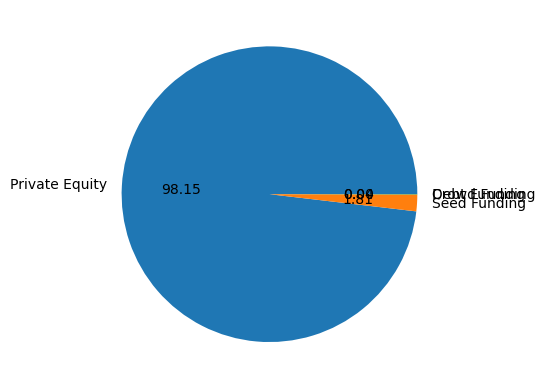

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

a = pd.read_csv('startup_funding.csv' , encoding = 'utf-8')
b = a.copy()

b = b.dropna(subset = ['InvestmentType'])

b['InvestmentType'] = b['InvestmentType'].str.strip().str.title()

b['InvestmentType'] = b['InvestmentType'].replace({'Privateequity' : 'Private Equity' , 'Seedfunding' : 'Seed Funding' })


# Clean Amount column
b['AmountInUSD'] = b['AmountInUSD'].str.replace(',', '')  
b['AmountInUSD'] = b['AmountInUSD'].replace('', '0')            # Replace empty string with 0
b['AmountInUSD'] = pd.to_numeric(b['AmountInUSD'], errors='coerce')  # Convert to float


amount_funded = b.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending=False)



total = amount_funded.sum()

for type, amount in amount_funded .items():
    percent = (amount/total)*100
    print(type , round(percent,2) )

plt.pie(amount_funded.values , labels = amount_funded.index , autopct = '%.2f' )
plt.show()





## Q5
Problem statement
Given File 'startup_funding.csv'

Which type of companies got more easily funding. To answer this question, find -

Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)

Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

Note :
Ecommerce is the right word in IndustryVertical, so correct it.

Print the industry in descending order with respect to the percentage of the amount funded.

Output Format :
industry1 percent1
industry2 percent2
industry3 percent3

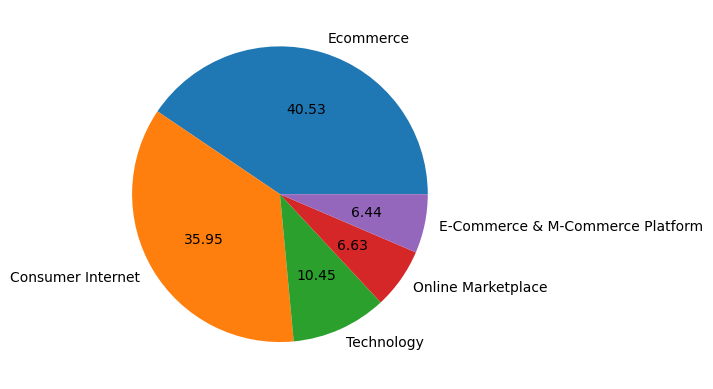

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce Platform 6.44


In [47]:
import pandas as pd
import matplotlib.pyplot as plt

a = pd.read_csv('startup_funding.csv' , encoding = 'utf-8')
b = a.copy()

b = b.dropna(subset = ['IndustryVertical'])

b['IndustryVertical'] = b['IndustryVertical'].str.strip().str.title()

b['IndustryVertical'] = b['IndustryVertical'].replace({'eCommerce' : ' Ecommerce' , 'eCommerce' : 'Ecommerce' , ' ECommerce': ' Ecommerce'  })


# Clean Amount column
b['AmountInUSD'] = b['AmountInUSD'].str.replace(',', '')  
b['AmountInUSD'] = b['AmountInUSD'].replace('', '0')            # Replace empty string with 0
b['AmountInUSD'] = pd.to_numeric(b['AmountInUSD'], errors='coerce')  # Convert to float


amount_industry = b.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending=False)

top_5 = amount_industry.head(5)

total = top_5.sum()


plt.pie(top_5.values , labels = top_5.index , autopct = '%.2f' )
plt.show()


for type, amount in top_5.items():
    percent = (amount/total)*100
    print(type , round(percent,2) )



## Q6
Problem statement
Given File 'startup_funding.csv'

Find top 5 startups with most amount of total funding.

Print the startup name in descending order with respect to amount of funding.

Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

Output Format :
startup1
startup2
startup3
. . . 

Paytm Flipkart Ola Snapdeal Oyo 

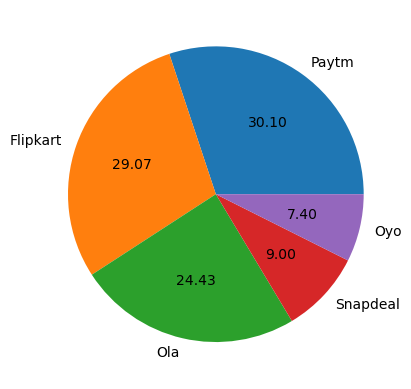

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

a = pd.read_csv('startup_funding.csv' , encoding = 'utf-8')
b = a.copy()

b = b.dropna(subset = ['StartupName'])

b['StartupName'] = b['StartupName'].str.strip()

b['StartupName'] = b['StartupName'].replace({'Paytm Marketplace' : 'Paytm',
                        
                                             'Olacabs':'Ola',
                                             'Ola Cabs' : 'Ola',
                                             
                                             'Flipkart.Com' : 'Flipkart',
                                             'Flipkart.com' : 'Flipkart',
                                             
                                             'Oyorooms': 'Oyo' , 
                                             'Oyo Rooms' :'Oyo' , 
                                             'OYOfit' : 'Oyo' , 
                                             'OYO Rooms': 'Oyo' })

# Clean Amount column
b['AmountInUSD'] = b['AmountInUSD'].str.replace(',', '')  
b['AmountInUSD'] = b['AmountInUSD'].replace('', '0')            # Replace empty string with 0
b['AmountInUSD'] = pd.to_numeric(b['AmountInUSD'], errors='coerce')  # Convert to float


amount_startup = b.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False)

top_5 = amount_startup.head(5)

total = top_5.sum()




for type in top_5.keys():
    print(type, end=' ')
    

plt.pie(top_5.values , labels = top_5.index , autopct = '%.2f' )
plt.show()

## Q7
Problem statement
Given File 'startup_funding.csv'

Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.

Print the startup name in descending order with respect to the number of funding round as integer value.

Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

Output Format :
startup1 number1
startup2 number2
startup3 number3
. . 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

a = pd.read_csv('startup_funding.csv' , encoding = 'utf-8')
b = a.copy()

b = b.dropna(subset = ['StartupName'])

b['StartupName'] = b['StartupName'].str.strip()

b['StartupName'] = b['StartupName'].replace({'Paytm Marketplace' : 'Paytm',
                        
                                             'Olacabs':'Ola',
                                             'Ola Cabs' : 'Ola',
                                             
                                             'Flipkart.Com' : 'Flipkart',
                                             'Flipkart.com' : 'Flipkart',
                                             
                                             'Oyorooms': 'Oyo' , 
                                             'Oyo Rooms' :'Oyo' , 
                                             'OYOfit' : 'Oyo' , 
                                             'OYO Rooms': 'Oyo' })


funding_rounds = b['StartupName'].value_counts().sort_values(ascending = False)

top_5 = funding_rounds.head(5)



for name,count in top_5.items():
    print(name,count)
    


Ola 9
Swiggy 7
Paytm 6
UrbanClap 6
Oyo 6


## Q8
Problem statement
Given File 'startup_funding.csv'

Find the Investors who have invested maximum number of times.

Print the investor name and number of times invested as integer value.

Note:
In startup, multiple investors might have invested. So consider each investor for that startup.

Ignore the undisclosed investors.

Output Format :
investorname number

In [48]:
import pandas as pd
import matplotlib.pyplot as plt


a = pd.read_csv('startup_funding.csv' , encoding = 'utf-8')
b = a.copy()



b = b.dropna(subset = ['InvestorsName'])


b['InvestorsName'] = b['InvestorsName'].str.strip()


investor_dict = {}

for entry in b['InvestorsName']:
    
    # inv() Yeh har investor name ke aage-piche ke extra spaces ko remove kar raha hai. Isse naam clean ho jate hain aur duplicates ko avoid karte hain.
    investors = [inv.strip() for inv in entry.split(',')]
    
    for inv in investors:
        if inv.lower() != 'undisclosed investors':
            if inv in investor_dict:
                investor_dict[inv] += 1
            else:
                investor_dict[inv] = 1



    
# Find top investor
top_investor = max(investor_dict, key=investor_dict.get)
top_count = investor_dict[top_investor]            

print(top_investor,top_count)
    


Sequoia Capital 64


## Project: Startup Funding Analysis
Analyzed Investment Trends: Explored funding patterns over the years using line charts.

City & Industry Insights: Identified top cities and industries for funding, visualized data with pie charts.

Funding Distribution: Examined funding percentages across investment types and locations.

Investor & Startup Highlights: Identified top startups and most active investors in the dataset.

Tools Used: Python (Pandas, Matplotlib)